---
title: "Random Forest"
format: 
  html:
    embed-resources: true
---

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
full_df = pd.read_csv("../data/clean/absenteeism_model_final.csv")
bss_df = pd.read_csv("../data/clean/absenteeism_model_final_bss.csv")

## Binary Classification

In [3]:
df1 = full_df.drop(columns=["high_absenteeism", "absenteeism_class", "high_absenteeism_doe", "total_students"])

X = df1
y = full_df["high_absenteeism"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


In [4]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


Confusion Matrix:
[[1850  402]
 [ 579 1009]]


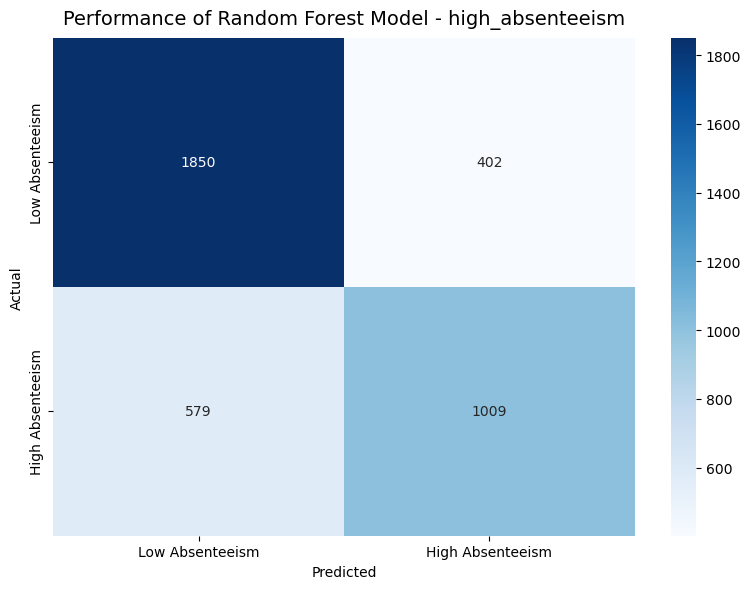


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2252
           1       0.72      0.64      0.67      1588

    accuracy                           0.74      3840
   macro avg       0.74      0.73      0.73      3840
weighted avg       0.74      0.74      0.74      3840



In [5]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Low Absenteeism", "High Absenteeism"], 
            yticklabels=["Low Absenteeism", "High Absenteeism"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Random Forest Model - high_absenteeism", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### Compute AUC and Plot ROC Curve

AUC: 0.7284


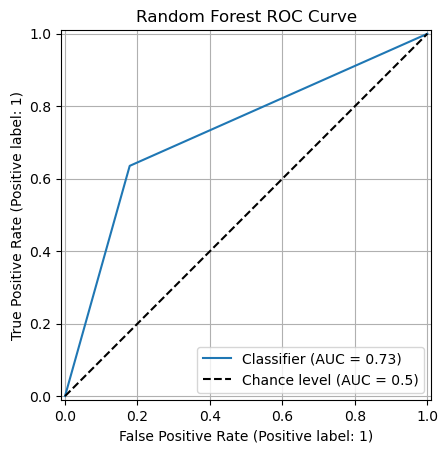

In [6]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred, plot_chance_level=True)
plt.title(f"Random Forest ROC Curve")
plt.grid(True)
plt.show()

Feature ranking:
1. student_poverty_ratio (0.15371081766549047)
2. white_pct (0.08512578326982854)
3. total_federal_revenue (0.08286663657768699)
4. total_employee_benefits (0.08011973635661775)
5. expenditures_per_student (0.0740672973593104)
6. total_state_revenue (0.07060350043457533)
7. american_indian_alaska_native_pct (0.06447427919087048)
8. total_local_revenue (0.06395362910663989)
9. total_salaries (0.06383660007700685)
10. hispanic_pct (0.06371061945308883)
11. total_expenditures (0.05869894376617646)
12. black_african_american_pct (0.05770759929453396)
13. asian_pacific_islander_pct (0.05002856875936273)
14. native_hawaiian_pacific_islander_pct (0.031095988688811426)


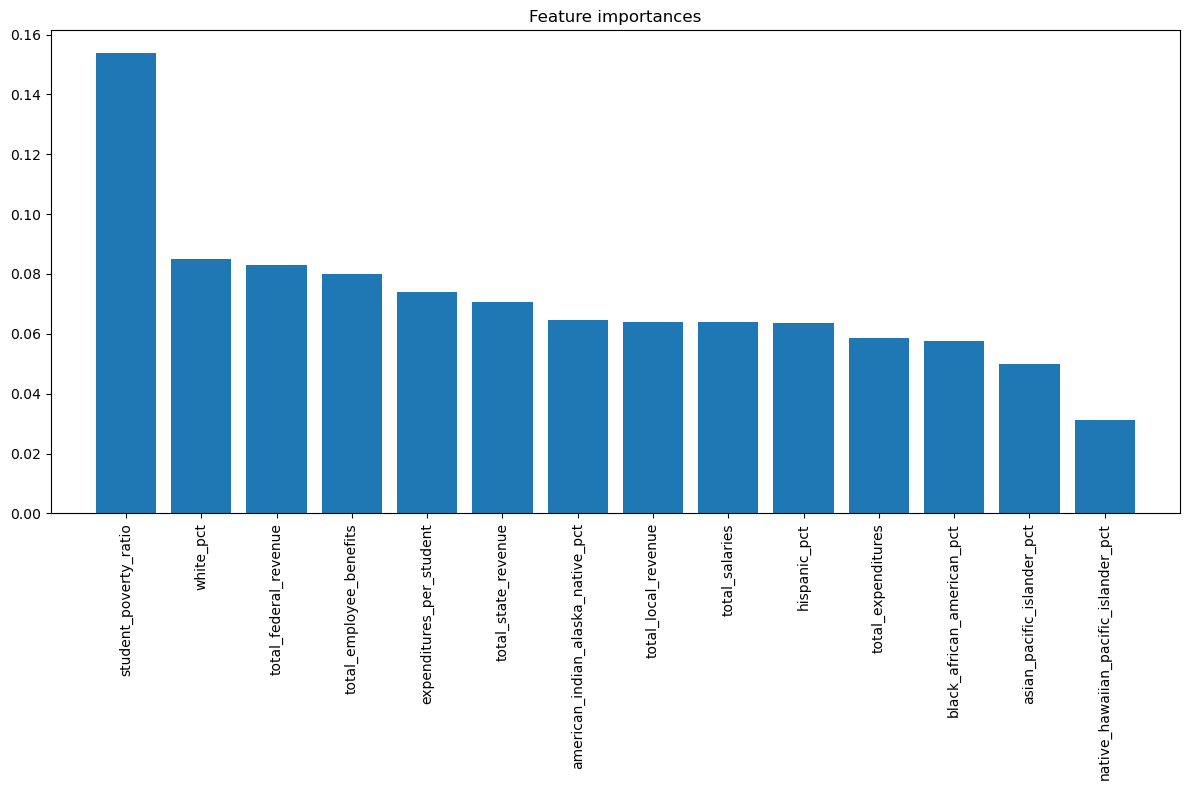

In [7]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]})")
# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()


## Multiclass Classification

In [8]:
X2 = full_df.drop(columns=["high_absenteeism", "absenteeism_class", "high_absenteeism_doe", "total_students"])
y2 = full_df["absenteeism_class"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.3, 
                                                    random_state=42)

Confusion Matrix:
[[890 281 136]
 [389 546 339]
 [158 297 804]]


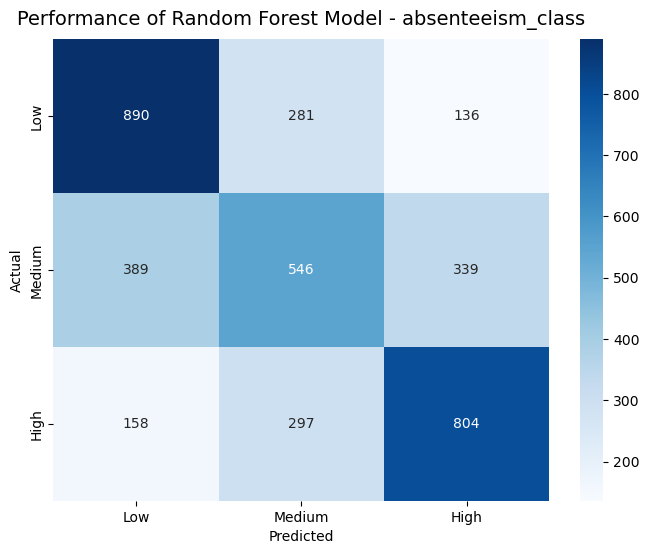


Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.68      0.65      1307
           2       0.49      0.43      0.46      1274
           3       0.63      0.64      0.63      1259

    accuracy                           0.58      3840
   macro avg       0.58      0.58      0.58      3840
weighted avg       0.58      0.58      0.58      3840



In [9]:
# Predict absenteeism_class
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = clf2.predict(X_test2)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Performance of Random Forest Model - absenteeism_class", fontsize=14, pad=10)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

Feature ranking:
1. student_poverty_ratio (0.15371081766549047)
2. white_pct (0.08512578326982854)
3. total_federal_revenue (0.08286663657768699)
4. total_employee_benefits (0.08011973635661775)
5. expenditures_per_student (0.0740672973593104)
6. total_state_revenue (0.07060350043457533)
7. american_indian_alaska_native_pct (0.06447427919087048)
8. total_local_revenue (0.06395362910663989)
9. total_salaries (0.06383660007700685)
10. hispanic_pct (0.06371061945308883)
11. total_expenditures (0.05869894376617646)
12. black_african_american_pct (0.05770759929453396)
13. asian_pacific_islander_pct (0.05002856875936273)
14. native_hawaiian_pacific_islander_pct (0.031095988688811426)


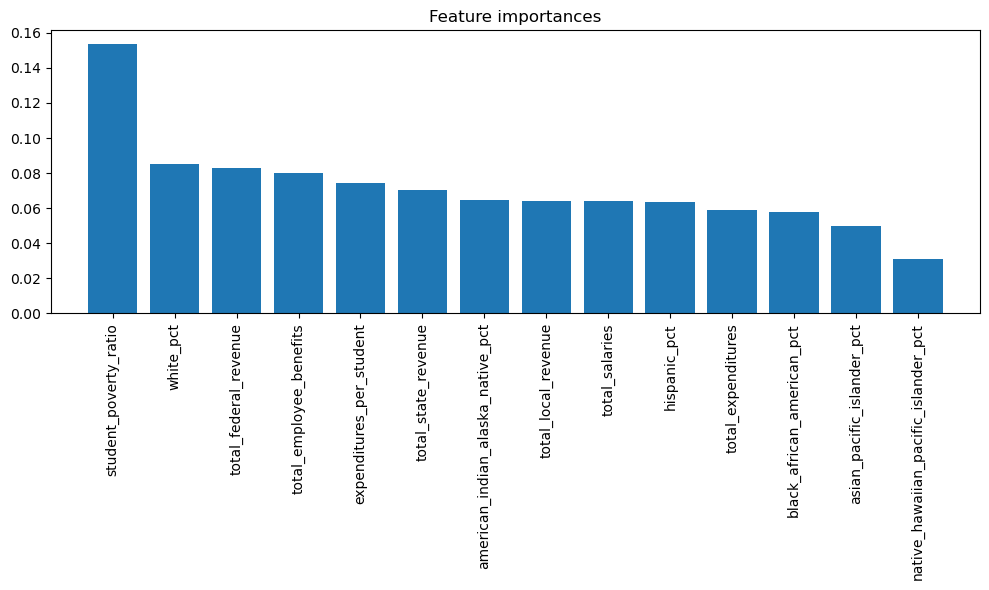

In [10]:
# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()